<a href="https://www.kaggle.com/code/benkim2284/ml-model-for-wine-quality-prediction?scriptVersionId=165159832" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Variable              : Correlation to Target
--------                ---------------------
fixed acidity         : 0.121970
volatile acidity      : -0.407394
citric acid           : 0.240821
residual sugar        : 0.022002
chlorides             : -0.124085
free sulfur dioxide   : -0.063260
total sulfur dioxide  : -0.183339
density               : -0.175208
pH                    : -0.052453
sulphates             : 0.257710
alcohol               : 0.484866


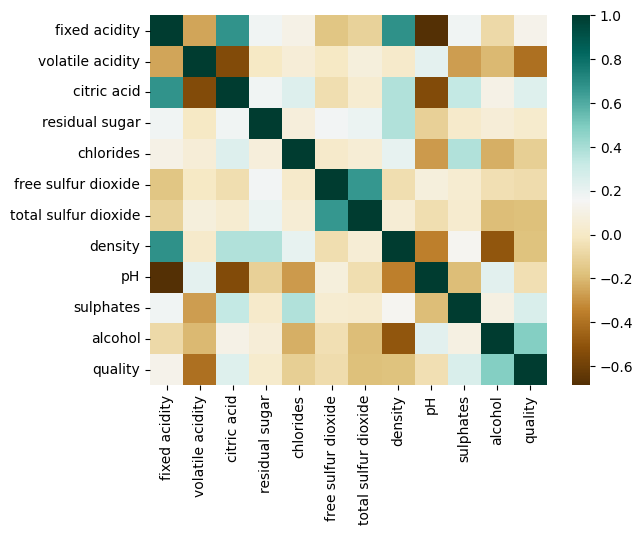

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

data = pd.read_csv('/kaggle/input/wine-quality-dataset/WineQT.csv')
np.random.seed(5)

# Data pre-processing
datab = data.drop("Id", axis = 1)

g = sns.heatmap(datab.corr(),cmap="BrBG",annot=False)

# Printing the correlation coeffecient between each variable and the output variable (wine quality)
print("%-22s: %s" % ("Variable", "Correlation to Target"))
print("%-22s  %s" % ("--------", "---------------------"))

for i in range(datab.shape[1] - 1):
    label = datab.columns[i]
    correlation = np.corrcoef(datab[label], datab["quality"])[0, 1]
    print("%-22s: %f" % (label, correlation))

# After analysis of the correlation coeffecients, drop the columns with very low correlation coeffecients
datab = datab.drop("residual sugar", axis = 1)
datab = datab.drop("pH", axis = 1)

# Convert to numpy array for simpler matrix operations
data = np.array(datab)
np.random.shuffle(data)

In [2]:
# Set up basic variables (training set, testing set, weights, biases)
numOfTestData = int(np.round(data.shape[0]*0.7))

# Training Data
train_data = data[:numOfTestData].T
x_train = train_data[:-1]
y_train = train_data[-1:]

# Testing Data
test_data = data[numOfTestData:].T
x_test = test_data[:-1]
y_test = test_data[-1:]

# Weights and biases
def init_params():
    w = np.random.rand(1, x_train.shape[0]) * 0
    b = 0
    return w, b

In [3]:
# Forward Pass
def forward(w, x, b):
    y_pred = np.add(np.dot(w,x), b)
    return y_pred

# Backward Pass
def backward(x, y_pred, y_train):
    dy = -(y_train - y_pred)
    dw = np.dot(dy, x.T) / x.shape[1]  # Divide by number of samples
    db = np.mean(dy)                   # Compute mean of dy
    return dw, db

# Update parameter
def update_params(dw, db, w, b, learn_rate):
    w -= learn_rate * dw
    b -= learn_rate * db
    return w, b

def mse(y, y_pred):
    print("MSE: " + str(np.mean(np.square(y - y_pred))))

In [4]:
def run(x, y, learn_rate, iterations):
    w, b = init_params()
    for i in range(iterations):
        y_pred = forward(w, x, b)
        # mse(y, y_pred)
        dw, db = backward(x, y_pred, y)
        w, b = update_params(dw, db, w, b, learn_rate)
    return w, b

In [5]:
# We are training the model now
w, b = run(x_train, y_train, 0.0005, 10000)

# Print out the Accuracy for our training data
y_predForTrain = np.round(forward(w, x_train, b))        
print("Accuracy for training data: " + str(np.sum(y_predForTrain == y_train) / y_train.size))

# Print out the Accuracy for our training data

y_predForTest = np.round(forward(w, x_test, b))
print("Accuracy for testing data: " + str(np.sum(y_predForTest == y_test) / y_test.size))
# mse(y_test, y_predForTest)

Accuracy for training data: 0.58
Accuracy for testing data: 0.6005830903790087


In [6]:
# Useful Commands

# print(np.rec.fromarrays([y_train, y_predForTest])[0])
# ^ allows us to see a side by side comparison of the predicted and actual data in a tuple form

# print(np.sum(y_predForTrain == y_train) / y_train.size))
# ^allows us to see the accuract rate given the predicted and the actual data